## Import lb

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

## Load data

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Alazizxan/Diagnosis-of-diabetes-ML/main/diabetes.csv")
df.head(10)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df2 = df.copy()

## Visualization

<ipython-input-7-a5aa8acb8585>:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df2.hist(ax=plt.gca())
<ipython-input-7-a5aa8acb8585>:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 2)
<ipython-input-7-a5aa8acb8585>:14: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 3)
<ipython-input-7-a5aa8acb8585>:19: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 4)
<ipython-input-7-a5aa8acb8585>:24: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  plt

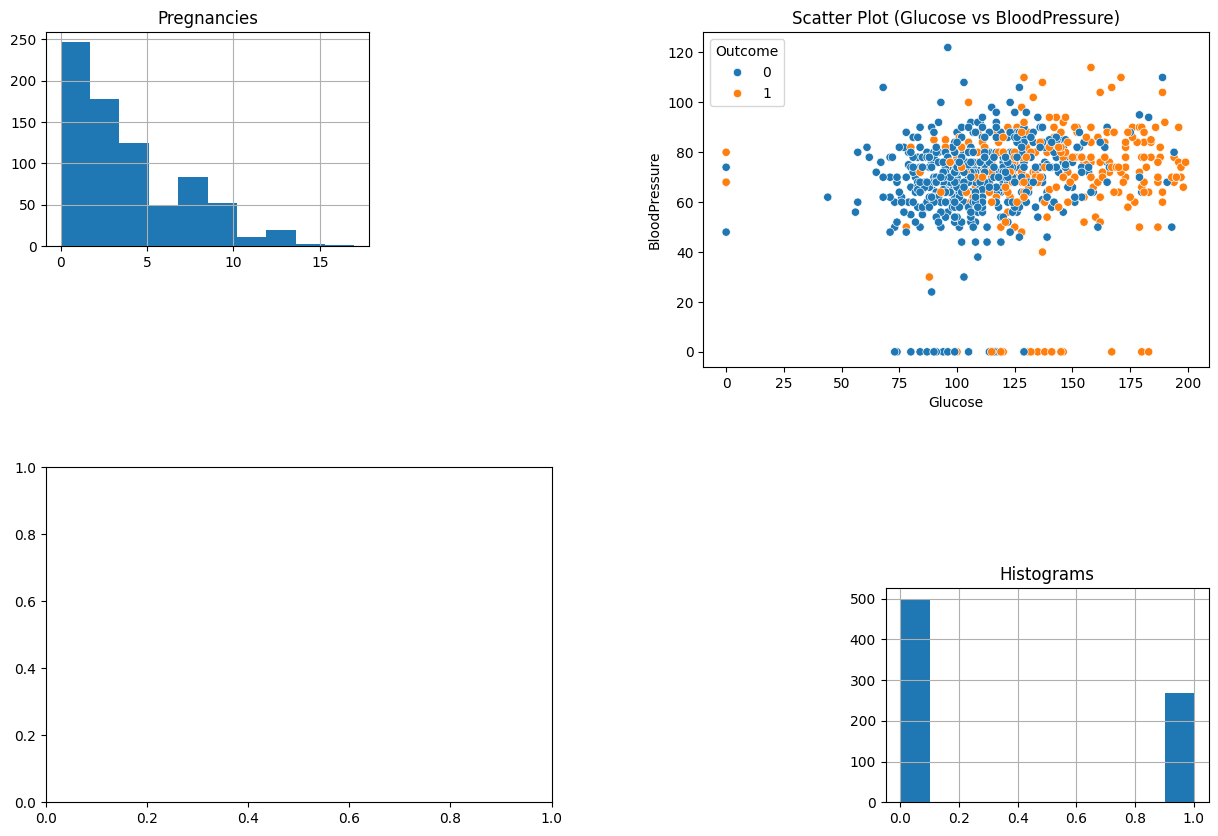

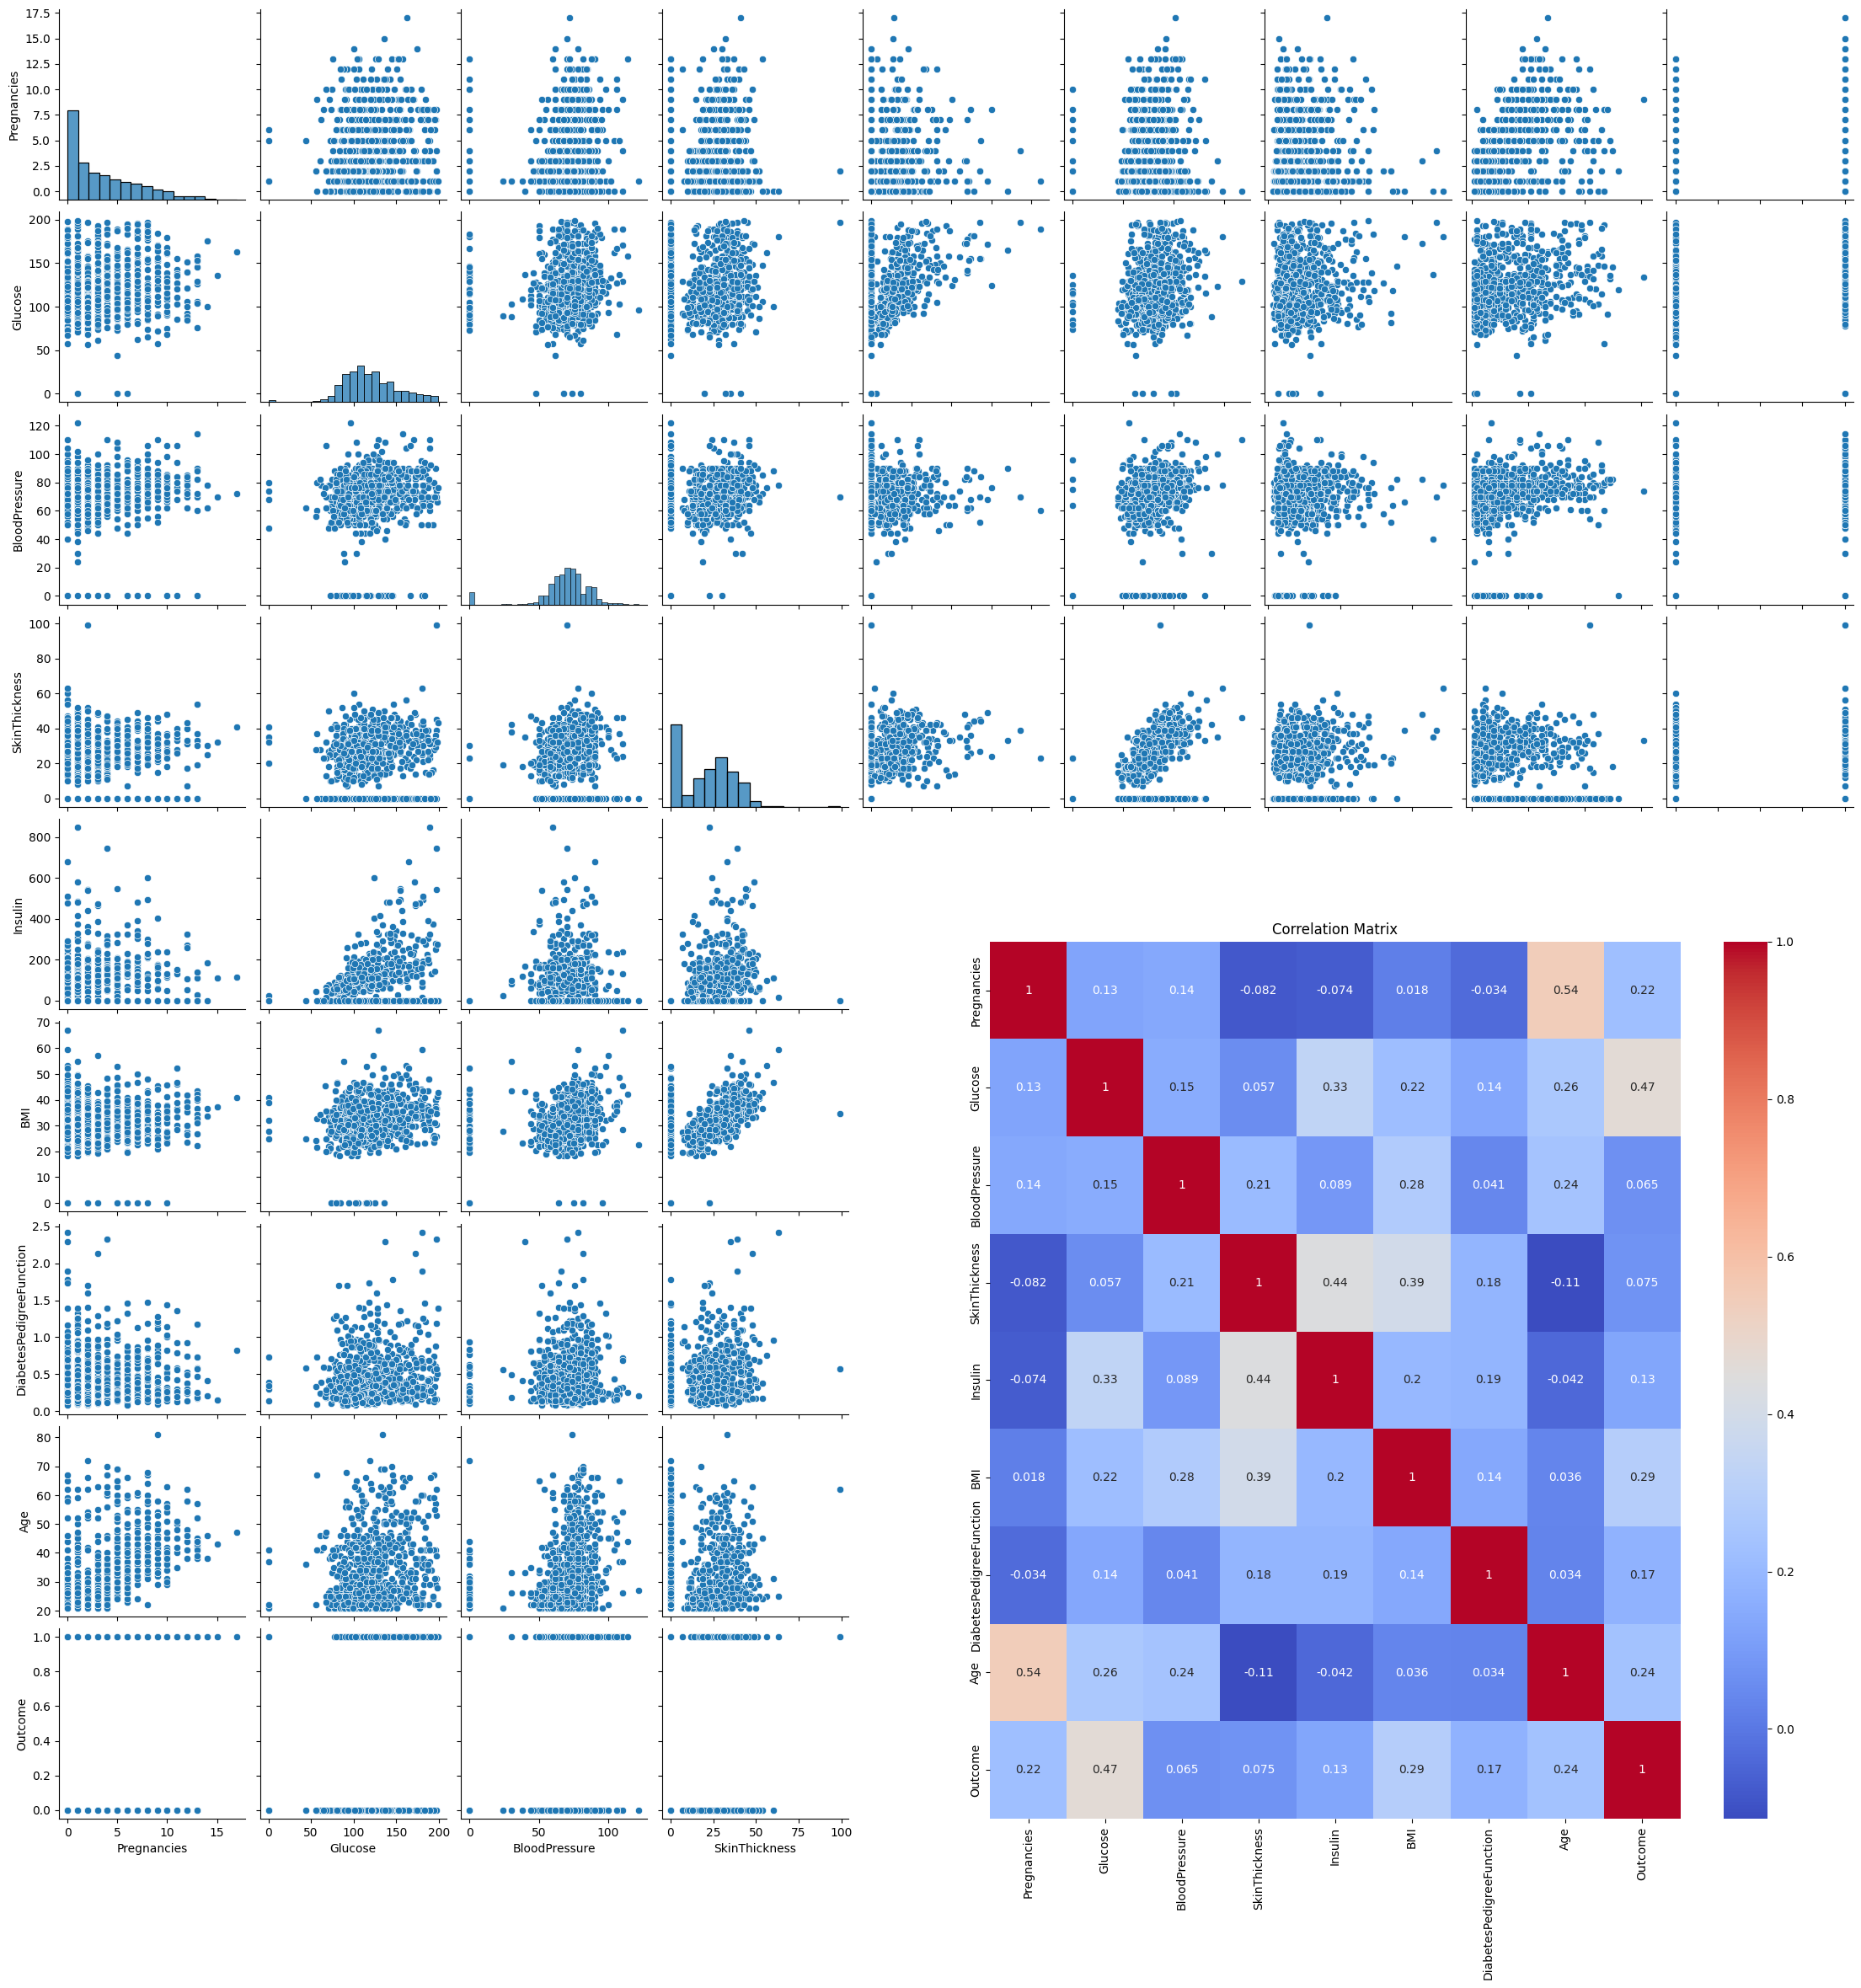

In [7]:
plt.figure(figsize=(15, 10))

# Histogram
plt.subplot(2, 2, 1)
df2.hist(ax=plt.gca())
plt.title('Histograms')

# Scatter plot (BloodPressure vs Glucose)
plt.subplot(2, 2, 2)
sns.scatterplot(data=df2, x='Glucose', y='BloodPressure', hue='Outcome')
plt.title('Scatter Plot (Glucose vs BloodPressure)')

# Pair plot
plt.subplot(2, 2, 3)
sns.pairplot(df2.dropna())
plt.title('Pair Plot')

# Korelyatsiya matritsasi
plt.subplot(2, 2, 4)
corr_matrix = df2.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

plt.tight_layout()
plt.show()

In [11]:

def count_zeros_in_columns(df):
    zero_counts = df.apply(lambda x: x[x == 0].count())
    return zero_counts

# Barcha ustunlardagi 0 qiymatlarni sanab chiqarish
zero_counts = count_zeros_in_columns(df)

# Natijani chiqarish
print("Barcha ustunlardagi 0 qiymatlarning sonlari:")
print(zero_counts)

Barcha ustunlardagi 0 qiymatlarning sonlari:
Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


## Data entry and cleaning

In [10]:
# Nollarni almashtirish (Insulin va BMI ustunlaridagi nollarni median qiymatlar bilan almashtiramiz)
dforg = df.copy()
df['Insulin'] = df['Insulin'].replace(0, np.nan)
df['BMI'] = df['BMI'].replace(0, np.nan)
df['BloodPressure'] = df['BloodPressure'].replace(0, np.nan)
df['SkinThickness'] = df['SkinThickness'].replace(0, np.nan)
df['Glucose'] = df['Glucose'].replace(0, np.nan)

# Insulin va BMI ustunlaridagi nollarni median qiymatlar bilan to'ldirish
df['Insulin'].fillna(df['Insulin'].median(), inplace=True)
df['BMI'].fillna(df['BMI'].median(), inplace=True)
df['BloodPressure'].fillna(df['BloodPressure'].median(), inplace=True)
df['SkinThickness'].fillna(df['SkinThickness'].median(), inplace=True)
df['Glucose'].fillna(df['Glucose'].median(), inplace=True)

# Ma'lumotlarni qayta ko'rib chiqish
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


## Modelling

In [12]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistik regressiya
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Qaror daraxti klassifikatori
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)

# Tasodifiy o'rmon klassifikatori
forest_clf = RandomForestClassifier()
forest_clf.fit(X_train, y_train)

# Support Vector Machine (SVM)
svm_clf = SVC()
svm_clf.fit(X_train, y_train)


SVC()

In [22]:
models = {
    "Logistic Regression": log_reg,
    "Decision Tree": tree_clf,
    "Random Forest": forest_clf,
    "SVM": svm_clf
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} - Aniqlik: {accuracy * 100:.2f}%")
    print(f"Aralashuv matritsasi:\n{confusion_matrix(y_test, y_pred)}")
    print(f"Klassifikatsiya hisoboti:\n{classification_report(y_test, y_pred)}\n")


Logistic Regression - Aniqlik: 75.32%
Aralashuv matritsasi:
[[82 17]
 [21 34]]
Klassifikatsiya hisoboti:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154


Decision Tree - Aniqlik: 69.48%
Aralashuv matritsasi:
[[75 24]
 [23 32]]
Klassifikatsiya hisoboti:
              precision    recall  f1-score   support

           0       0.77      0.76      0.76        99
           1       0.57      0.58      0.58        55

    accuracy                           0.69       154
   macro avg       0.67      0.67      0.67       154
weighted avg       0.70      0.69      0.70       154


Random Forest - Aniqlik: 75.32%
Aralashuv matritsasi:
[[78 21]
 [17 38]]
Klassifikatsiya hisoboti:
              precision    recall  f1-sco

## Model evolution

cleaning data

In [24]:
dforg['Insulin'] = dforg['Insulin'].replace(0, np.nan)
dforg['SkinThickness'] = dforg['SkinThickness'].replace(0, np.nan)

# SkinThickness va Insulin ustunlaridagi NaN qiymatlari mavjud bo'lgan qatorlarni olib tashlash
df_cleaned = dforg.dropna(subset=['Insulin', 'SkinThickness'])

# Natijani chiqarish
print("Tozalangan ma'lumotlar:")
df_cleaned

Tozalangan ma'lumotlar:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.0,125.0,33.6,0.627,50,1
1,1,85,66,29.0,125.0,26.6,0.351,31,0
3,1,89,66,23.0,94.0,28.1,0.167,21,0
4,0,137,40,35.0,168.0,43.1,2.288,33,1
6,3,78,50,32.0,88.0,31.0,0.248,26,1
...,...,...,...,...,...,...,...,...,...
761,9,170,74,31.0,125.0,44.0,0.403,43,1
763,10,101,76,48.0,180.0,32.9,0.171,63,0
764,2,122,70,27.0,125.0,36.8,0.340,27,0
765,5,121,72,23.0,112.0,26.2,0.245,30,0


In [26]:
# Nollarni almashtirish (Insulin va BMI ustunlaridagi nollarni median qiymatlar bilan almashtiramiz)
df_cleaned['Glucose'] = df_cleaned['Glucose'].replace(0, np.nan)
df_cleaned['BMI'] = df_cleaned['BMI'].replace(0, np.nan)
df_cleaned['BloodPressure'] = df_cleaned['BloodPressure'].replace(0, np.nan)

# Insulin va BMI ustunlaridagi nollarni median qiymatlar bilan to'ldirish
df_cleaned['Glucose'].fillna(df_cleaned['Glucose'].median(), inplace=True)
df_cleaned['BMI'].fillna(df_cleaned['BMI'].median(), inplace=True)
df_cleaned['BloodPressure'].fillna(df_cleaned['BloodPressure'].median(), inplace=True)
# Ma'lumotlarni qayta ko'rib chiqish
df_cleaned.head()


<ipython-input-26-5ece5e0a533b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Glucose'] = df_cleaned['Glucose'].replace(0, np.nan)
<ipython-input-26-5ece5e0a533b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['BMI'] = df_cleaned['BMI'].replace(0, np.nan)
<ipython-input-26-5ece5e0a533b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1


In [27]:
count_zeros_in_columns(df_cleaned)

Pregnancies                  79
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     361
dtype: int64

In [29]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 541 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               541 non-null    int64  
 1   Glucose                   541 non-null    float64
 2   BloodPressure             541 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   541 non-null    float64
 5   BMI                       541 non-null    float64
 6   DiabetesPedigreeFunction  541 non-null    float64
 7   Age                       541 non-null    int64  
 8   Outcome                   541 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 42.3 KB


## Modelling

In [30]:
X = df_cleaned.drop('Outcome', axis=1)
y = df_cleaned['Outcome']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistik regressiya
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Qaror daraxti klassifikatori
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)

# Tasodifiy o'rmon klassifikatori
forest_clf = RandomForestClassifier()
forest_clf.fit(X_train, y_train)

# Support Vector Machine (SVM)
svm_clf = SVC()
svm_clf.fit(X_train, y_train)


SVC()

Model natijalari:
                 Model  Accuracy
0  Logistic Regression  0.788991
1        Decision Tree  0.844037
2        Random Forest  0.926606
3                  SVM  0.844037


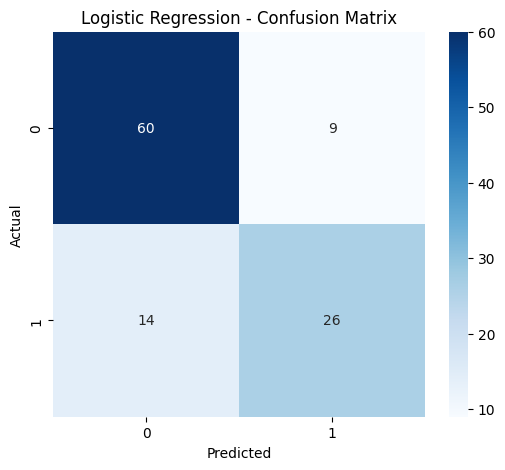

Logistic Regression - Klassifikatsiya Hisoboti:
              precision    recall  f1-score     support
0              0.810811  0.869565  0.839161   69.000000
1              0.742857  0.650000  0.693333   40.000000
accuracy       0.788991  0.788991  0.788991    0.788991
macro avg      0.776834  0.759783  0.766247  109.000000
weighted avg   0.785874  0.788991  0.785646  109.000000




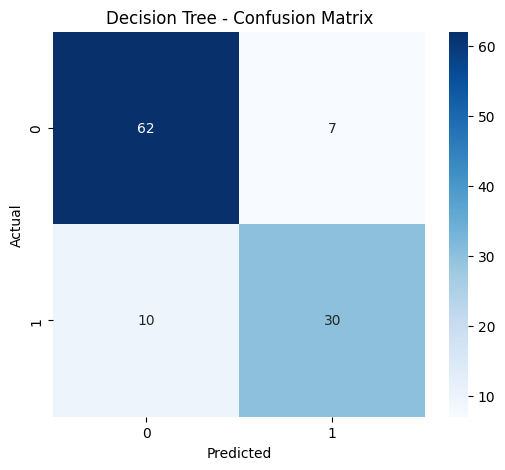

Decision Tree - Klassifikatsiya Hisoboti:
              precision    recall  f1-score     support
0              0.861111  0.898551  0.879433   69.000000
1              0.810811  0.750000  0.779221   40.000000
accuracy       0.844037  0.844037  0.844037    0.844037
macro avg      0.835961  0.824275  0.829327  109.000000
weighted avg   0.842652  0.844037  0.842658  109.000000




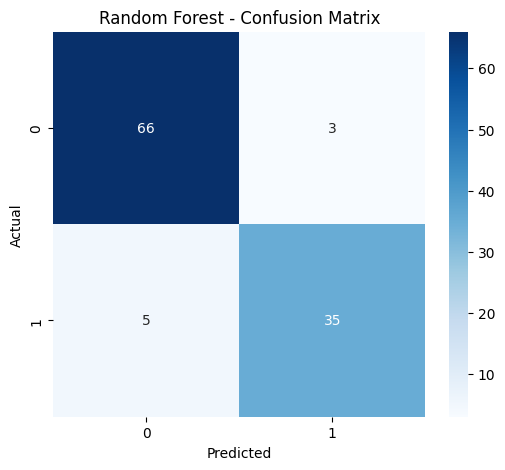

Random Forest - Klassifikatsiya Hisoboti:
              precision    recall  f1-score     support
0              0.929577  0.956522  0.942857   69.000000
1              0.921053  0.875000  0.897436   40.000000
accuracy       0.926606  0.926606  0.926606    0.926606
macro avg      0.925315  0.915761  0.920147  109.000000
weighted avg   0.926449  0.926606  0.926189  109.000000




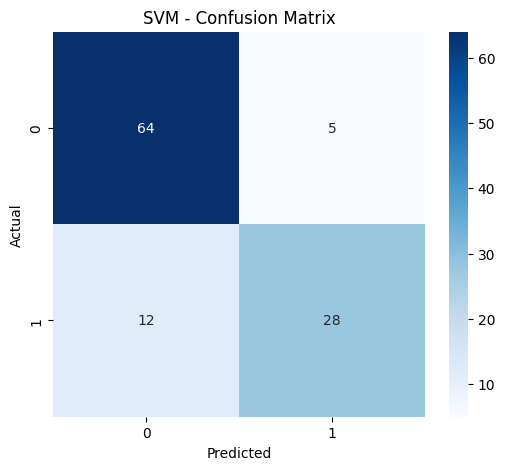

SVM - Klassifikatsiya Hisoboti:
              precision    recall  f1-score     support
0              0.842105  0.927536  0.882759   69.000000
1              0.848485  0.700000  0.767123   40.000000
accuracy       0.844037  0.844037  0.844037    0.844037
macro avg      0.845295  0.813768  0.824941  109.000000
weighted avg   0.844446  0.844037  0.840324  109.000000




In [31]:
results = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Confusion Matrix": confusion_matrix(y_test, y_pred),
        "Classification Report": classification_report(y_test, y_pred, output_dict=True)
    })

# Natijalarni jadvalda chiqarish
results_df = pd.DataFrame({
    "Model": [result["Model"] for result in results],
    "Accuracy": [result["Accuracy"] for result in results]
})

print("Model natijalari:")
print(results_df)

# Korelyatsiya matritsasini chizish

# Modellar natijalarini vizualizatsiya qilish
for result in results:
    model_name = result["Model"]
    confusion_mtx = result["Confusion Matrix"]

    plt.figure(figsize=(6, 5))
    sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    report = pd.DataFrame(result["Classification Report"]).transpose()
    print(f"{model_name} - Klassifikatsiya Hisoboti:")
    print(report)
    print("\n")